In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')  #Suppress filter warnings

# Read data

In [31]:
chillerdata = pd.read_excel('../../DataCleaning/CleanedData.xlsx',sheet_name='CH1')

chillerdata.drop(columns='Unnamed: 0',axis=0,inplace=True)
# chiller_capacity = 600
# #Convert the load to kW
# chillerdata['Load'] = chillerdata['Load']*3.5169

chillerdata.head()

,Time_range,Day_of_week,Occupancy,month,Tdb,Twb,CHLR_LCHWT,CHLR_LCWT,CHLR_RCHWT,CHLR_RCWT,...,CW_flow,CWET,CWLT,ELE,CHLR_ON,PLR,PLR_sec,chillers_no,Load,kW_ton
0,2019-01-01 00:00:00,2,Unoccupied,Jan,46.940,44.930620,44.950,54.825,48.775,56.575,...,1798.325,54.907,56.215,31.00,1,0.155743,1.383711,1,93.445547,0.331744
1,2019-01-01 01:00:00,2,Unoccupied,Jan,46.604,44.656086,44.700,54.650,48.650,56.375,...,1801.663,54.748,56.078,30.75,1,0.160112,1.417633,1,96.067292,0.320088
2,2019-01-01 02:00:00,2,Unoccupied,Jan,44.060,42.622744,44.900,54.875,48.550,56.500,...,1802.898,54.930,56.192,31.25,1,0.154403,1.356249,1,92.641562,0.337322
3,2019-01-01 03:00:00,2,Unoccupied,Jan,43.934,43.015251,44.975,54.875,48.700,56.450,...,1801.423,54.867,56.120,31.25,1,0.155532,1.421435,1,93.319010,0.334873
4,2019-01-01 04:00:00,2,Unoccupied,Jan,42.875,42.421400,45.000,54.925,48.600,56.650,...,1800.285,54.973,56.280,30.50,1,0.152975,1.341871,1,91.785000,0.332298


**All Chillers**

In [32]:
chillers = pd.read_excel('../../DataCleaning/Combined_cleaned_data.xlsx',)
chillers.head()

,Time_range,Day_of_week,Occupancy,month,Tdb,Twb,CHLR_LCHWT_CH1,CHLR_LCWT_CH1,CHLR_RCHWT_CH1,CHLR_RCWT_CH1,...,CWET_CH4,CWLT_CH4,ELE_CH4,CHLR_ON_CH4,PLR_CH4,PLR_sec_CH4,chillers_no_CH4,Load_CH4,kW_ton_CH4,Total_load
0,2019-01-01 00:00:00,2,Unoccupied,Jan,46.940,44.930620,44.950,54.825,48.775,56.575,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,93.445547
1,2019-01-01 01:00:00,2,Unoccupied,Jan,46.604,44.656086,44.700,54.650,48.650,56.375,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,96.067292
2,2019-01-01 02:00:00,2,Unoccupied,Jan,44.060,42.622744,44.900,54.875,48.550,56.500,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,92.641562
3,2019-01-01 03:00:00,2,Unoccupied,Jan,43.934,43.015251,44.975,54.875,48.700,56.450,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,93.319010
4,2019-01-01 04:00:00,2,Unoccupied,Jan,42.875,42.421400,45.000,54.925,48.600,56.650,...,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,91.785000


**Weather data**

In [33]:
weather = pd.read_excel('../../NOAA__747460__03904 - EASTERWOOD FIELD AIRPORT - 01012019 to 01012021.xlsx',)
weather.columns = ['Date & time','Tdb','Twb','Tdp']

weather.head()

,Date & time,Tdb,Twb,Tdp
0,2019-01-01 00:00:00,46.940,44.930620,42.980
1,2019-01-01 01:00:00,46.604,44.656086,42.749
2,2019-01-01 02:00:00,44.060,42.622744,41.126
3,2019-01-01 03:00:00,43.934,43.015251,42.080
4,2019-01-01 04:00:00,42.875,42.421400,41.954


# Chiller Data Plot

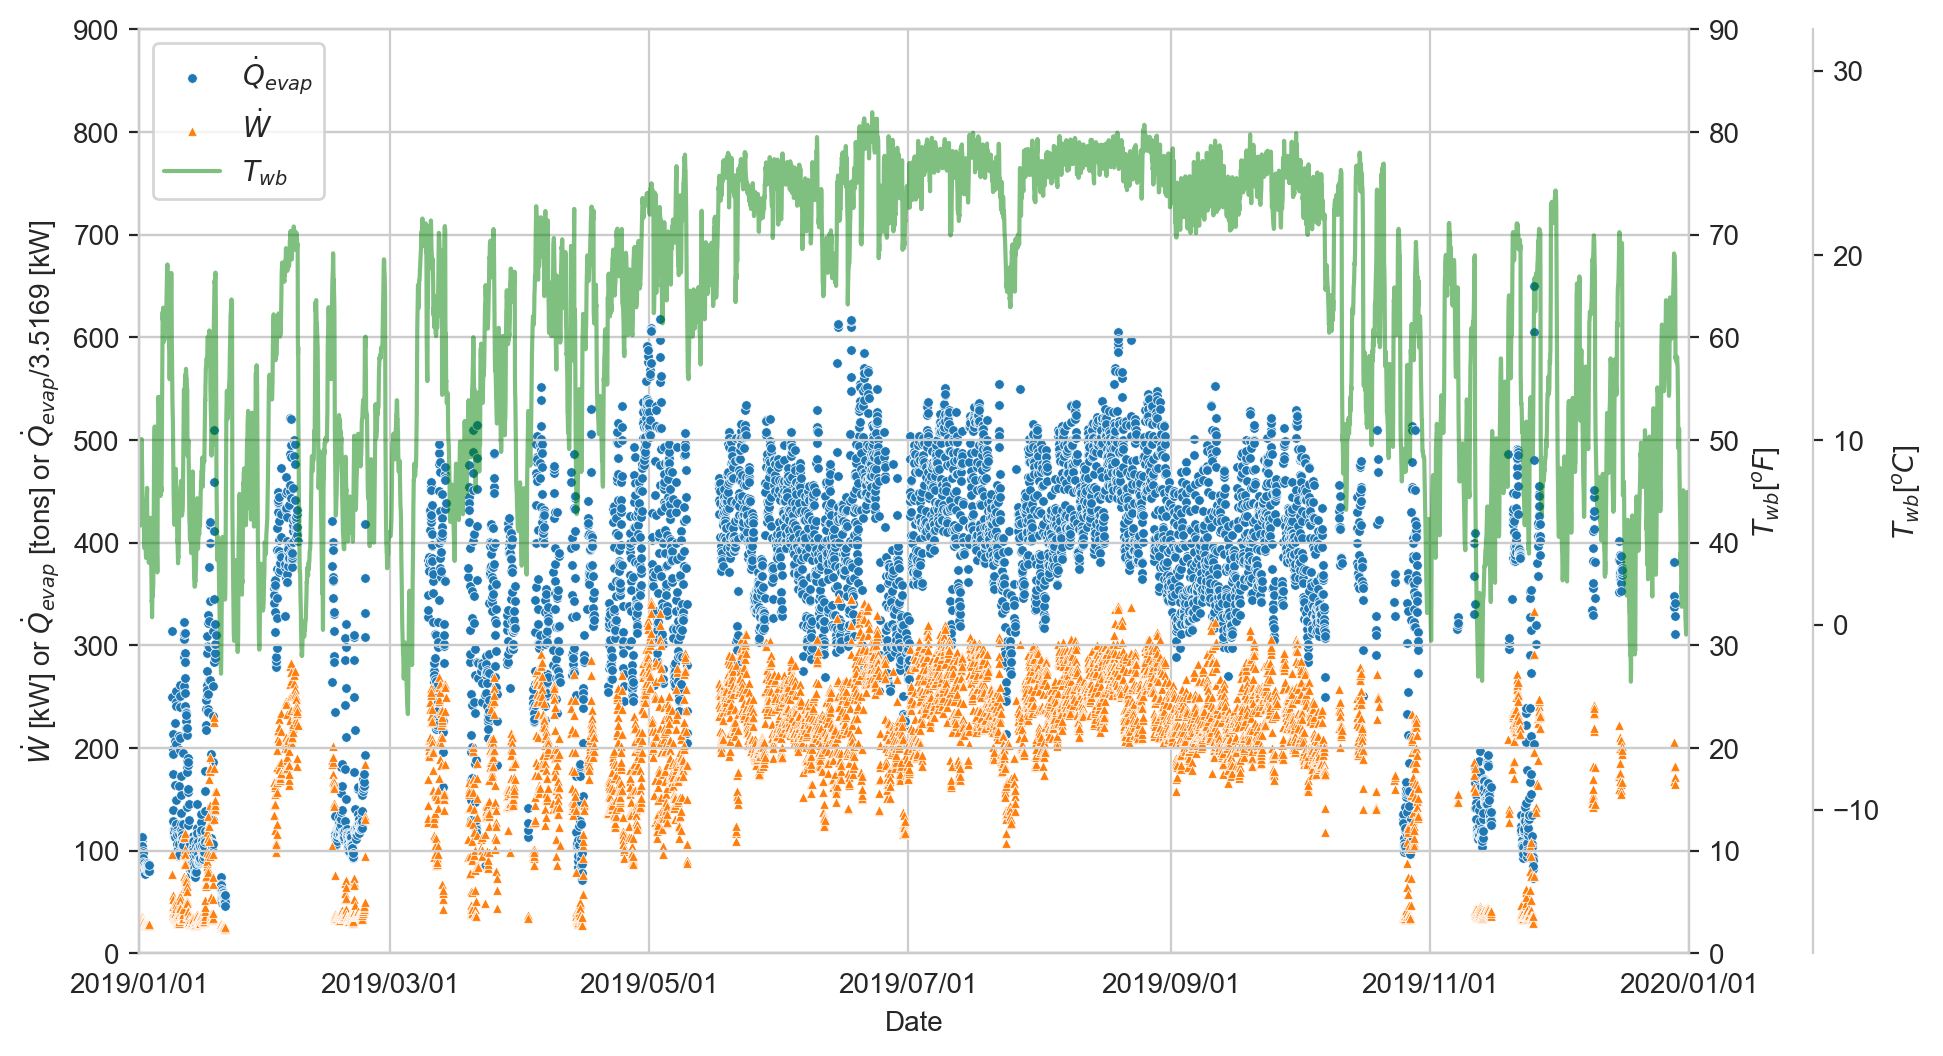

In [34]:
#Distribution of weather conditions
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,6),dpi=200)

ax = sns.scatterplot(data=chillerdata,x='Time_range',y='Load',s=12)
sns.scatterplot(data=chillerdata,x='Time_range',y='ELE',ax=ax,s=12,marker='^');
ax.set_xlim(datetime(2019,1,1),datetime(2020,1,1))
ax.set_ylim([0,900])
ax.set_xlabel('Date')
ax.set_ylabel('$\dot{W}$ [kW] or $\dot{Q}_{evap}$ [tons] or $\dot{Q}_{evap}$/3.5169 [kW]')
        
ax2 = ax.twinx()
sns.lineplot(data=weather,x='Date & time',y='Twb',ax=ax2,color='green',alpha=0.5)
ax2.set_ylabel('$T_{wb}$[$^{o}F$]')
ax2.set_ylim([0,90])

ax3 = ax.twinx()
ax3.set_ylim((0-32)*5/9,(90-32)*5/9)
ax3.spines['right'].set_position(('axes',1.08))
ax3.grid(False)
ax3.set_ylabel('$T_{wb}$[$^{o}C$]')

date_format = mdates.DateFormatter('%Y/%m/%d')  # Define date format
plt.gca().xaxis.set_major_formatter(date_format)  # Set date format to x-axis
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=36))  # Set interval between dates


#Legend
plots = [ax.get_children()[0],ax.get_children()[1], ax2.get_children()[0]]
labels = ['$\dot{Q}_{evap}$','$\dot{W}$','$T_{wb}$']
legend = plt.legend(plots, labels, loc='upper left',fontsize=10);
for text in legend.get_texts():
    text.set_fontweight('bold')

fig.savefig('CH1_MeasuredData_Plot.png',bbox_inches='tight')

# **INVESTIGATION OF THE M&V MODELS ON FULL CYCLE**                                                

**1. Create a dictionary to store model performance data**

In [35]:
#Dictionary to store models
full_cycle_models = {'temp_ind':[],'quasi_emp':[],'GN_no_interc':[],'GN_DS':[],'GN_w_interc':[],
                     'GN_split':[],'GN_Foliaco':[],'biquadratic':[],
                     'multivariate':[],'4CP':[],'RefCurves':[]}

# Functions and Classes

**Feature generation class**

In [36]:
class FeatureGenerator:
        
    class TempIndep:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'Load','ELE'}, Load in kW and ELE in kW
            """
            self.vars_df = vars_df
        def y_label(self):
            COP_rec = self.vars_df['ELE']/(self.vars_df['Load'])
            return COP_rec 
        def X_features(self):
            Load_rec = 1/(self.vars_df['Load'])
            return Load_rec.to_numpy().reshape((-1,1))
    
    class QuasiEmpirical:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','CHWST','Load','ELE'} 
            The temperarures are in F and load in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
        def y_label(self):
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
            #Convert the temps to K
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9+273.15
            self.vars_df['CHWST'] = (self.vars_df['CHWST']-32)*5/9+273.15 
            self.vars_df['y'] = (1+1/self.vars_df['COP'])*self.vars_df['Load']-self.vars_df['Load']*self.vars_df['CWRT']/self.vars_df['CHWST']
            return self.vars_df['y']
        def X_features(self):
            self.vars_df['x1'] = self.vars_df['CWRT']
            self.vars_df['x2'] = self.vars_df['CWRT']/self.vars_df['CHWST']
            return self.vars_df[['x1','x2']]
    class GNFundamental:
        def __init__(self,vars_df):
            """
            This works well for GN fundamental model, with or without intercept
            The df vars_df is entered with columns {'CWRT','CHWST','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
        def y_label(self):
            #Convert the temps to K
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9+273.15
            self.vars_df['CHWST'] = (self.vars_df['CHWST']-32)*5/9+273.15 
            self.vars_df['y'] = (1+1/self.vars_df['COP'])*self.vars_df['CHWST']/self.vars_df['CWRT']-1
            return self.vars_df['y']
        def X_features(self):
            #GN model regression variables
            self.vars_df['x1'] = self.vars_df['CHWST']/self.vars_df['Load']
            self.vars_df['x2'] = (self.vars_df['CWRT']-self.vars_df['CHWST'])/(self.vars_df['CWRT']*self.vars_df['Load'])
            self.vars_df['x3'] = self.vars_df['Load']/self.vars_df['CWRT']*(1+1/self.vars_df['COP'])
            return self.vars_df[['x1','x2','x3']]
        
    class GNFundamental_DS:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','CHWST','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
        def y_label(self):
            #Convert the temps to K
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9+273.15
            self.vars_df['CHWST'] = (self.vars_df['CHWST']-32)*5/9+273.15 
            self.vars_df['y'] = (1+1/self.vars_df['COP'])*self.vars_df['CHWST']/self.vars_df['CWRT']-1
            return self.vars_df['y']
        def X_features(self,Tcho_des = (44-32)*5/9+273.15,Q_rated = 2110):
            self.vars_df['x1'] = self.vars_df['CHWST']/self.vars_df['Load']
            #Rated parameters
            self.vars_df['x2'] = self.vars_df['x1']*self.vars_df['CHWST']/Tcho_des
            self.vars_df['x3'] = self.vars_df['x1']*self.vars_df['Load']/Q_rated
            self.vars_df['x4'] = (self.vars_df['CWRT']-self.vars_df['CHWST'])/(self.vars_df['CWRT']*self.vars_df['Load'])
            self.vars_df['x5'] = self.vars_df['Load']/self.vars_df['CWRT']*(1+1/self.vars_df['COP'])
            return self.vars_df[['x1','x2','x3','x4','x5']]
        
    class GNSplit_Qleak:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','CHWST','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
        def y_label(self):
            #Convert the temps to K
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9+273.15
            self.vars_df['CHWST'] = (self.vars_df['CHWST']-32)*5/9+273.15
            #Model y label
            self.vars_df['y'] = (1+1/self.vars_df['COP'])*self.vars_df['CHWST']/self.vars_df['CWRT']-1
            return self.vars_df['y']
        def X_features(self):
            self.vars_df['x1'] = self.vars_df['CHWST']/self.vars_df['Load']
            self.vars_df['x2'] = (self.vars_df['CWRT']-self.vars_df['CHWST'])/(self.vars_df['CWRT']*self.vars_df['Load'])
            self.vars_df['x3'] = self.vars_df['CHWST']/(self.vars_df['Load']*self.vars_df['CWRT'])
            self.vars_df['x4'] = self.vars_df['Load']/self.vars_df['CWRT']*(1+1/self.vars_df['COP'])
            return self.vars_df[['x1','x2','x3','x4']]
        
    class GNFoliaco:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','CHWST','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
        def y_label(self):
            #Convert the temps to K
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9+273.15
            self.vars_df['CHWST'] = (self.vars_df['CHWST']-32)*5/9+273.15
            #Model y label
            self.vars_df['y'] = self.vars_df['ELE']-(self.vars_df['CWRT']-
                                                     self.vars_df['CHWST'])*self.vars_df['Load']/self.vars_df['CHWST']
            return self.vars_df['y']
        def X_features(self):
            self.vars_df['x1'] = self.vars_df['CWRT']
            self.vars_df['x2'] = (self.vars_df['CWRT']-self.vars_df['CHWST'])/self.vars_df['CHWST']
            self.vars_df['x3'] = self.vars_df['Load']*(self.vars_df['Load']+self.vars_df['ELE'])/self.vars_df['CHWST']
            return self.vars_df[['x1','x2','x3']]
        
    class BiQuadratic:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
        def y_label(self):
            self.vars_df['y'] = 1/self.vars_df['COP']
            return self.vars_df['y']
        def X_features(self):
            #Convert the temps to C
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9
            #Features
            self.vars_df['x1'] = 1/self.vars_df['Load']
            self.vars_df['x2'] = self.vars_df['Load']
            self.vars_df['x3'] = self.vars_df['CWRT']/self.vars_df['Load']
            self.vars_df['x4'] = self.vars_df['CWRT']**2/self.vars_df['Load']
            self.vars_df['x5'] = self.vars_df['CWRT']
            self.vars_df['x6'] = self.vars_df['CWRT']*self.vars_df['Load']
            self.vars_df['x7'] = self.vars_df['CWRT']**2
            self.vars_df['x8'] = self.vars_df['Load']*self.vars_df['CWRT']**2
            return self.vars_df[['x1','x2','x3','x4','x5','x6','x7','x8']]
    class MultiVariate:
        def __init__(self,vars_df):
            """
            The df vars_df is entered with columns {'CWRT','CHWRT','Load','ELE'}
            The temperarures are in F and Load and ELE in kW
            The symbols of the variables should be used as is
            """
            self.vars_df = vars_df
            self.vars_df['COP'] = self.vars_df['Load']/self.vars_df['ELE']
        def y_label(self):
            self.vars_df['y'] =self.vars_df['COP']
            return self.vars_df['y']
        def X_features(self):
            #Convert the temps to C
            self.vars_df['CWRT'] = (self.vars_df['CWRT']-32)*5/9
            self.vars_df['CHWRT'] = (self.vars_df['CHWRT']-32)*5/9
            #Features
            polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
            poly_features = polynomial_converter.fit_transform(self.vars_df[['CWRT','CHWRT','Load']])
            X_features = pd.DataFrame(data=poly_features,index=self.vars_df.index,
                                      columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9'])
            return X_features

**Predictions and stats class**

In [37]:
class ypred_and_stats():
        
    def y_pred(model,X):
        """
        Model = Originally created regression model
        X = Dataframe of X features, created from the FeatureGenerator Class
        """
        y_pred = model.predict(X)
        return y_pred
    def pred_stats(y,y_pred):
        """
        This function returns a dictionary of prediction stats {R2,RMSE,CV}, in that order
        
        y = y-label extracted from the FeatureGenerator class functions or measured ELE; entered as a Series 
        y_pred = Model-predicted y-label from the y_pred function of the ypred_and_stats class or predicted ELE; entered as a Series
        
        """
        MAE = mean_absolute_error(y,y_pred)
        MSE = mean_squared_error(y,y_pred)
        RMSE = np.sqrt(MSE)
        CV = RMSE*100/np.mean(y)
        SE = (y_pred - y)**2
        ST = (y - y.mean())**2
        R2 = 1-SE.sum()/ST.sum()
        
        stats = {'R2':R2,'RMSE':RMSE,'CV':CV}
        return stats

**Power prediction from model**

In [38]:
class ModelPower():
    def __init__(self,vars_df):
        """vars_df: The dataframe to which to store the predicted electrical consumption"""
        self.vars_df = vars_df

    def temp_indep_model(Load,y_pred):
        """Parameters:
        Load: The chiller load in ton
        y_pred: The model's predicted variable, input as a series
        """
        ELE_pred = Load*y_pred
        return ELE_pred
    
    def quasi_empirical_model(self,Load,y_pred,CWRT,CHWST):
        """Parameters:/n
        Load: The chiller load in kW, supplied as a series from the df of either the training or testing dataset
        y_pred: The model's predicted variable, input as a series from the df of the training dataset
        CWRT: The condenser water return temperature in K. As a series extracted from the df of the training or testing dataset
        CHWST: Chilled water supply temperature in K. As a series extracted from the df of the training or testing dataset
        """
        COP_rec = (y_pred+Load*CWRT/CHWST)/Load-1
        self.vars_df['ELE_pred'] = Load*COP_rec
        return self.vars_df['ELE_pred']
    
    def GN_fundamental_model(self,Load,y_pred,CWRT,CHWST):
        """
        This function can be used with the Fundamental GN model with and without intercept, and with split Qleak term
        It can also be used with the Fundamental GN model with variable DS term
        Parameters:
        Load: The chiller load in kW, supplied as a series from the df of the training or testing datasets
        y_pred: The model's predicted variable, input as a series from the df of the metering sample/n
        CWRT: The condenser water return temperature in K. As a series extracted from the df of the metering sample/n
        CHWST: Chilled water supply temperature in K. As a series extracted from the df of the metering sample/n
        """
        COP_rec = (y_pred+1)*CWRT/CHWST-1
        self.vars_df['ELE_pred'] =Load*COP_rec
        return self.vars_df['ELE_pred']
    
    def GN_Foliaco_model(self,Load,y_pred,CWRT,CHWST):
        """
        Parameters:
        Load: The chiller load in kW, supplied as a series from the df of the training or testing datasets
        y_pred: The model's predicted variable, input as a series from the df of the metering sample/n
        CWRT: The condenser water return temperature in K. As a series extracted from the df of the metering sample/n
        CHWST: Chilled water supply temperature in K. As a series extracted from the df of the metering sample/n
        """
        self.vars_df['ELE_pred'] = y_pred+(CWRT-CHWST)*Load/CHWST
        return self.vars_df['ELE_pred']
    
    def biquadratic_model(self,Load,y_pred):
        """
        Parameters:
        Load: The chiller load in kW, supplied as a series from the df of the training or testing datasets
        y_pred: The model's predicted variable, input as a series from the df of the training or testing datasets
        """
        self.vars_df['ELE_pred'] = Load*y_pred
        return self.vars_df['ELE_pred']
    
    def multivariate_model(self,Load,y_pred):
        """
        Parameters:/n
        Load: The chiller load in kW, supplied as a series from the df of the metering sample/n
        y_pred: The model's predicted variable, input as a series from the df of the metering sample/n
        """
        self.vars_df['ELE_pred'] = Load/y_pred
        return self.vars_df['ELE_pred']

**DOE2 Model Curves**

In [39]:
class DOE2_curves:
    def capft(CHWST,CWRT,a0,a1,a2,a3,a4,a5):
        """
            The temperatures are in the Celsius scale
        """
        return a0+a1*CHWST+a2*CHWST**2+a3*CWRT+a4*CWRT**2+a5*CHWST*CWRT

    def eirft(CHWST,CWRT,b0,b1,b2,b3,b4,b5):
        """
        The temperatures are in the Celsius scale
        """
        return b0+b1*CHWST+b2*CHWST**2+b3*CWRT+b4*CWRT**2+b5*CHWST*CWRT

    def eirfplr(PLR,c0,c1,c2):
        """
        PLR is a fraction
        """
        return c0+c1*PLR+c2*PLR**2

**Dictionary to contain sample test and train performances**

In [40]:
train_performances = {'temp_ind':[],'quasi_emp':[],'GN_no_interc':[],'GN_DS':[],'GN_w_interc':[],'GN_split':[],'GN_Foliaco':[],
         'biquadratic':[],'multivariate':[],'4CP':[],'RefCurves':[]}

test_performances = {'temp_ind':[],'quasi_emp':[],'GN_no_interc':[],'GN_DS':[],'GN_w_interc':[],'GN_split':[],'GN_Foliaco':[],
         'biquadratic':[],'multivariate':[],'4CP':[],'RefCurves':[]}

# **4.1 Temperature-independent model**

**MODEL EQUATION**

$\frac{1}{COP} = a_{1}.\frac{1}{Q_{ev}} + a_{0}$

In [41]:
#Model features
model_vars = chillerdata[['Load','ELE']]
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.TempIndep(model_vars).X_features()
y = FeatureGenerator.TempIndep(model_vars).y_label()

#Create the train and test sets
np.random.seed(42)   #Sets the seeding number for the randint function to choose the seed_numbers
sample_number = 30   #Number of sampling to create different train-test data performance computations
seed_numbers = np.random.randint(0,101,size=sample_number) #Random creation of seed numbers

#For storage of model stats
full_cycle_stats = pd.DataFrame(columns=['R2_train','RMSE_train','CV_train [%]',
                                        'RMSE_test','CV_test [%]'],
                                index=['temp_ind','quasi_emp','GN_no_interc','GN_DS','GN_w_interc',
                                       'GN_split','GN_Foliaco','biquadratic','multivariate',
                                       '4CP','RefCurves'])

#Initialization of an array of stats DataFrames
stats = [full_cycle_models]*sample_number

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression()
    model.fit(X_train,y_train)

    #y-predictions and model stats
    train_pred = ypred_and_stats.y_pred(model=model,X=X_train)
    train_ystats = ypred_and_stats.pred_stats(y=y_train,y_pred=train_pred)
    test_pred = ypred_and_stats.y_pred(model=model,X=X_test)
    test_ystats = ypred_and_stats.pred_stats(y=y_test,y_pred=test_pred)

    #Train and test datasets
    train_set = pd.DataFrame(X_train,columns=['1/Load'])
    test_set = pd.DataFrame(X_test,columns=['1/Load'])

    train_set['y'] = y_train.reset_index(drop=True)
    train_set['ELE'] = train_set['y']/train_set['1/Load']   #Drop the original index too ensure combination of y_train and the other df
    test_set['y'] = y_test.reset_index(drop=True)
    test_set['ELE'] = test_set['y']/train_set['1/Load']

    #Power Predictions

    train_set['y_pred'] = train_pred
    train_set['ELE_pred'] = ModelPower.temp_indep_model(1/train_set['1/Load'],train_pred)
    train_set['COP_pred'] = 1/(train_set['1/Load']*train_set['ELE_pred'])
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['y_pred'] = test_pred
    test_set['ELE_pred'] = ModelPower.temp_indep_model(1/test_set['1/Load'],test_pred)
    test_set['COP_pred'] = 1/(test_set['1/Load']*test_set['ELE_pred'])
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['temp_ind'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])
    
    #Create a copy of the full_cycle_stats DataFram for each iteration
    stats[i] = full_cycle_stats.copy()

    stats[i]['R2_train']['temp_ind'] = train_kWstats['R2']
    stats[i]['RMSE_train']['temp_ind'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['temp_ind'] = train_kWstats['CV']

    stats[i]['RMSE_test']['temp_ind'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['temp_ind'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['temp_ind'] = train_set
test_performances['temp_ind'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
             mean       std       mean       std         mean       std   
temp_ind  0.92855  0.001666  20.882491  0.247457    10.599198  0.152384   

          RMSE_test           CV_test [%]            
               mean       std        mean       std  
temp_ind  80.018276  1.646046    42.51742  1.021193

# **4.2 Quasi-empirical GN model (1994/95)**

**MODEL EQUATION**

$(\frac{1}{COP}+1).Q_{ev}-Q_{ev}.\frac{T_{cwi}}{T_{cho}} = a_{0}+a_{1}.T_{cwi}+a_{2}.\frac{T_{cwi}}{T_{cho}}$

$y = a_{o}+a_{1}.x_{1}+a_{2}.x_{2}$

In [42]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.QuasiEmpirical(model_vars).X_features()
y = FeatureGenerator.QuasiEmpirical(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).quasi_empirical_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).quasi_empirical_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['quasi_emp'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['quasi_emp'] = train_kWstats['R2']
    stats[i]['RMSE_train']['quasi_emp'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['quasi_emp'] = train_kWstats['CV']

    stats[i]['RMSE_test']['quasi_emp'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['quasi_emp'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['quasi_emp'] = train_set
test_performances['quasi_emp'] = test_set
    
#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
               mean       std       mean       std         mean       std   
quasi_emp  0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind   0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

           RMSE_test           CV_test [%]            
                mean       std        mean       std  
quasi_emp  15.503931  0.225492    7.875414  0.125361  
temp_ind   80.018276  1.646046   42.517420  1.021193

# **4.3 GN model with zero intercept (2000)**

**MODEL EQUATION**

$(\frac{1}{COP}+1).\frac{T_{cho}}{T_{cwi}}-1 = a_{1}.\frac{T_{cho}}{Q_{ev}}+a_{2}.\frac{T_{cwi}-T_{cho}}{T_{cwi}.Q_{ev}}+
a_{3}.\frac{Q_{ev}}{T_{cwi}}(1+\frac{1}{COP})$

$y = a_{1}.x_{1}+a_{2}.x_{2}+a_{3}x_{3}$

In [43]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.GNFundamental(model_vars).X_features()
y = FeatureGenerator.GNFundamental(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).GN_fundamental_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).GN_fundamental_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['GN_no_interc'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['GN_no_interc'] = train_kWstats['R2']
    stats[i]['RMSE_train']['GN_no_interc'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['GN_no_interc'] = train_kWstats['CV']

    stats[i]['RMSE_test']['GN_no_interc'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['GN_no_interc'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['GN_no_interc'] = train_set
test_performances['GN_no_interc'] = test_set
    
#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# 4.4 GN model DS = f(Tcho,PLR)

* **W. Jiang and T.A. Reddy (2003):**
    * The GN model was not originally developed for chillers with VSD or inlet vanes capacity control
    * ${\Delta}S$ is expected to varry with chiller PLR
    * The authors investigated the following expression:
    * ${\Delta}S = a_{1}+a_{2}\bigg(\frac{Q_{ev}}{Q_{ev,rated}}\bigg)$
    
    * I **preliminarily investigated** the effect of including Tchi with a lab chiller data from the RP-1043 ASHRAE project
    * The following expression showed the best performance:
    * ${\Delta}S = a_{1}+a_{2}\bigg(\frac{T_{cho}}{T_{cho,des}}\bigg)+a_{3}\bigg(\frac{Q_{ev}}{Q_{ev,rated}}\bigg)$

**REFORMULATED EQUATION**

$\bigg(\frac{1}{COP}+1\bigg).\frac{T_{cho}}{T_{cwi}}-1 = \bigg(a_{1}+a_{2}.\frac{T_{cho}}{T_{cho,des}}+a_{3}\frac{Q_{ev}}{Q_{ev,rated}}\bigg).\frac{T_{cho}}{Q_{ev}}+a_{4}.\frac{T_{cwi}-T_{cho}}{T_{cwi}.Q_{ev}}+a_{5}.\frac{Q_{ev}}{T_{cwi}}\bigg(1+\frac{1}{COP}\bigg)$

$y = a_{1}.x_{1}+a_{2}.x_{2}+a_{3}x_{3}+a_{4}x_{4}+a_{5}x_{5}$

In [44]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

#Rated parameters: The variable GS GN model uses these to generate the features
Tcho_des = (44-32)*5/9+273.15
Q_rated = 2110 #kW

X = FeatureGenerator.GNFundamental_DS(model_vars).X_features()
y = FeatureGenerator.GNFundamental_DS(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).GN_fundamental_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).GN_fundamental_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['GN_DS'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['GN_DS'] = train_kWstats['R2']
    stats[i]['RMSE_train']['GN_DS'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['GN_DS'] = train_kWstats['CV']

    stats[i]['RMSE_test']['GN_DS'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['GN_DS'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['GN_DS'] = train_set
test_performances['GN_DS'] = test_set
    
#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# **4.5 GN model with intercept (2000)**

**MODEL EQUATION**

$(\frac{1}{COP}+1).\frac{T_{cho}}{T_{cwi}}-1 = a_{0}+a_{1}.\frac{T_{cho}}{Q_{ev}}+a_{2}.\frac{T_{cwi}-T_{cho}}{T_{cwi}.Q_{ev}}+
a_{3}.\frac{Q_{ev}}{T_{cwi}}(1+\frac{1}{COP})$

$y = a_{0}+a_{1}.x_{1}+a_{2}.x_{2}+a_{3}x_{3}$

In [45]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.GNFundamental(model_vars).X_features()
y = FeatureGenerator.GNFundamental(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).GN_fundamental_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).GN_fundamental_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['GN_w_interc'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['GN_w_interc'] = train_kWstats['R2']
    stats[i]['RMSE_train']['GN_w_interc'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['GN_w_interc'] = train_kWstats['CV']

    stats[i]['RMSE_test']['GN_w_interc'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['GN_w_interc'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['GN_w_interc'] = train_set
test_performances['GN_w_interc'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# 4.6 GN Model with split Q_leak

* The Fundamental GN model is written in the book 'Cool Thermodynamics (Gordon & Ng (2000)) as:
$\bigg(\frac{1}{COP}+1\bigg).\frac{T_{cho}}{T_{cwi}}-1 = {\Delta}S_{int}.\frac{T_{cho}}{Q_{ev}}+Q_{leak,eqv}.\frac{T_{cwi}-T_{cho}}{T_{cwi}.Q_{ev}}+ R.\frac{Q_{ev}}{T_{cwi}}\bigg(1+\frac{1}{COP}\bigg)$

* The authors assume the heat leakage term as being constant. 

* The Model derivation shows that:
$Q_{leak,eqv} = Q_{leak,evap}+Q_{leak,comp}.\frac{T_{cho}}{T_{cwi}-T_{cho}}$

* This analysis focusses on the effect of **treating the evap and comp leakage terms seperately**.  

* Therefore, the model equation becomes:

$\bigg(\frac{1}{COP}+1\bigg).\frac{T_{cho}}{T_{cwi}}-1 = {\Delta}S_{int}.\frac{T_{cho}}{Q_{ev}}+Q_{leak,evap}.\frac{T_{cwi}-T_{cho}}{T_{cwi}.Q_{ev}}+Q_{leak,comp}.\frac{T_{cho}}{Q_{ev}.T_{cwi}}+ R.\frac{Q_{ev}}{T_{cwi}}\bigg(1+\frac{1}{COP}\bigg)$

* This can be linearized as:
*$y = a_{1}.x_{1}+a_{2}.x_{2}+a_{3}.x_{3}+a_{4}.x_{4}$

In [46]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.GNSplit_Qleak(model_vars).X_features()
y = FeatureGenerator.GNSplit_Qleak(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).GN_fundamental_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).GN_fundamental_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']


    # Store full-cycle model and model stats
    full_cycle_models['GN_split'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['GN_split'] = train_kWstats['R2']
    stats[i]['RMSE_train']['GN_split'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['GN_split'] = train_kWstats['CV']

    stats[i]['RMSE_test']['GN_split'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['GN_split'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['GN_split'] = train_set
test_performances['GN_split'] = test_set
    
#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# 4.7 GN - Foliaco Model (2020)

* B. Foliaco et al. (2020) reformulated the GN fundamental model for easier application to M&V:
* They changed the dependent variable from COP to $\dot{W}$

* Therefore, the model equation becomes:

$W_{ele} - \bigg(\frac{T_{cwi}-T_{cho}}{T_{cho}}\bigg)Q_{ev} = {\Delta}S_{int}T_{cwi}+
Q_{leak,eqv}\bigg(\frac{T_{cwi}-T_{cho}}{T_{cho}}\bigg)+R\bigg(\frac{Q_{ev}^2+Q_{ev}W_{ele}}{T_{cho}}\bigg)$

* This can be linearized as:
*$y = a_{1}.x_{1}+a_{2}.x_{2}+a_{3}.x_{3}$

In [47]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.GNFoliaco(model_vars).X_features()
y = FeatureGenerator.GNFoliaco(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['COP'] = train_set['Load']/train_set['ELE']
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).GN_Foliaco_model(train_set['Load'],train_set['y_pred'],
                                                            train_set['CWRT'],train_set['CHWST'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['COP'] = test_set['Load']/test_set['ELE']
    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).GN_Foliaco_model(test_set['Load'],test_set['y_pred'],
                                                            test_set['CWRT'],test_set['CHWST'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']

    # Store full-cycle model and model stats
    full_cycle_models['GN_Foliaco'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['GN_Foliaco'] = train_kWstats['R2']
    stats[i]['RMSE_train']['GN_Foliaco'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['GN_Foliaco'] = train_kWstats['CV']

    stats[i]['RMSE_test']['GN_Foliaco'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['GN_Foliaco'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['GN_Foliaco'] = train_set
test_performances['GN_Foliaco'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_Foliaco    0.977828  0.000526  11.632085  0.080112     5.903879  0.046555   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_Foliaco    11.590016  0.187391    5.887396  0.108776  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# **4.8 Bi-quadratic black box model**

**MODEL EQUATION**

$\frac{1}{COP}=b_{0}+b_{1}.\frac{1}{Q_{ev}}+b_{2}.Q_{ev}+
b_{3}.\frac{T_{cwi}}{Q_{ev}}+b_{4}.\frac{T_{cwi}^{2}}{Q_{ev}}+b_{5}.T_{cwi}+b_{6}.Q_{ev}T_{cwi}+b_{7}.T_{cwi}^{2}+b_{8}.Q_{ev}T_{cwi}^2$

$y = b_{0}+b_{1}.x_{1}+b_{2}.x_{2}+b_{3}x_{3}+b_{4}x_{4}+b_{5}x_{5}
+b_{6}x_{6}+b_{7}x_{7}+b_{8}x_{8}$

In [48]:
#Model features
model_vars = chillerdata[['CWET','CHLR_LCHWT','Load','ELE']] 
model_vars.columns = ['CWRT','CHWST','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.BiQuadratic(model_vars).X_features()
y = FeatureGenerator.BiQuadratic(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).biquadratic_model(train_set['Load'],train_set['y_pred'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).biquadratic_model(test_set['Load'],test_set['y_pred'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']

    # Store full-cycle model and model stats
    full_cycle_models['biquadratic'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['biquadratic'] = train_kWstats['R2']
    stats[i]['RMSE_train']['biquadratic'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['biquadratic'] = train_kWstats['CV']

    stats[i]['RMSE_test']['biquadratic'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['biquadratic'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['biquadratic'] = train_set
test_performances['biquadratic'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_Foliaco    0.977828  0.000526  11.632085  0.080112     5.903879  0.046555   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
biquadratic   0.983851  0.000335   9.927459  0.056572     5.038728  0.039355   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_Foliaco    11.590016  0.187391    5.887396  0.108776  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
biquadratic    9.924944  0.121259    5.041698  0.083527  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# **4.9 Multi-variate (2-degree Polynomial) black box model**

**MODEL EQUATION**

$COP=b_{0}+b_{1}.Q_{ev}+b_{2}.T_{chi}+b_{3}.T_{cwi}+ b_{4}.Q_{ev}^{2}+b_{5}.T_{chi}^{2}+b_{6}.T_{cwi}^{2}+b_{7}.Q_{ev}T_{chi}+b_{8}.Q_{ev}T_{cwi}+b_{9}.T_{chi}T_{cwi}$

$y = b_{0}+b_{1}.x_{1}+b_{2}.x_{2}+b_{3}x_{3}+b_{4}x_{4}+b_{5}x_{5}
+b_{6}x_{6}+b_{7}x_{7}+b_{8}x_{8}+b_{9}x_{9}$

In [49]:
#Model features
model_vars = chillerdata[['CWET','CHLR_RCHWT','Load','ELE']]
model_vars.columns = ['CWRT','CHWRT','Load','ELE']
model_vars['Load'] = model_vars['Load']*3.5169 

X = FeatureGenerator.MultiVariate(model_vars).X_features()
y = FeatureGenerator.MultiVariate(model_vars).y_label()

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Model regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    train_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_train.sort_index())
    
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]
    test_set['y_pred'] = ypred_and_stats.y_pred(model=model,X=X_test.sort_index())
    
    #Model stats
    train_ystats = ypred_and_stats.pred_stats(y=train_set['y'],y_pred=train_set['y_pred'])
    test_ystats = ypred_and_stats.pred_stats(y=test_set['y'],y_pred=test_set['y_pred'])

    #Power Predictions
    train_set['1/COP'] = 1/train_set['COP']
    train_set['ELE_pred'] = ModelPower(train_set).multivariate_model(train_set['Load'],train_set['y_pred'])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = 1/train_set['COP_pred']

    test_set['1/COP'] = 1/test_set['COP']
    test_set['ELE_pred'] = ModelPower(test_set).multivariate_model(test_set['Load'],test_set['y_pred'])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = 1/test_set['COP_pred']

    # Store full-cycle model and model stats
    full_cycle_models['multivariate'] = model
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])

    stats[i]['R2_train']['multivariate'] = train_kWstats['R2']
    stats[i]['RMSE_train']['multivariate'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['multivariate'] = train_kWstats['CV']

    stats[i]['RMSE_test']['multivariate'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['multivariate'] = test_kWstats['CV']
    
#Save one of the model's performance datasets
train_performances['multivariate'] = train_set
test_performances['multivariate'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_Foliaco    0.977828  0.000526  11.632085  0.080112     5.903879  0.046555   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
biquadratic   0.983851  0.000335   9.927459  0.056572     5.038728  0.039355   
multivariate  0.973210  0.000893  12.785891  0.208884     6.489552  0.112452   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_Foliaco    11.590016  0.187391    5.887396  0.108776  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
biquadratic    9.924944  0.121259    5.041698  0.083527  
multivariate  12.805251  0.372510    6.504600  0.194188  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# **4.10 CP power model: A.Q. Mohammad et. al (2017)**

**MODEL EQUATION**

$ELE = b_{1}(T_{wb}-b_{2})^{-}+b_{3}(T_{wb}-b_{2})^{+}+b_{4}$

In [50]:
from scipy.optimize import curve_fit

#Model function
def elec_CP(x,b1,b2,b3,b4):
    return np.piecewise(x, [x < b2], [lambda x:b1*x + b4-b1*b2, lambda x:b3*x + b4-b3*b2])

#Data 
model_vars = chillerdata[['Twb','ELE','Load']]
model_vars['Load'] = model_vars['Load']*3.5169
model_vars['1/COP'] = model_vars['ELE']/model_vars['Load']
model_vars['NewIndex'] = range(len(model_vars))
model_vars.set_index('NewIndex',inplace=True,drop=True)
X = model_vars['Twb']
y = model_vars['ELE']

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    #Initial guesses
    CP = (X_train.min()+X_train.max())/2
    idxmax = X_train.sort_index().idxmax()
    y_Xmax = y_train.sort_index().iloc[idxmax]
    idxmin = X_train.sort_index().idxmin()
    y_Xmin = y_train.sort_index().loc[idxmin]
    Ycp = (y_Xmax+y_Xmin)/2
    LS = (Ycp-y_Xmin)/(CP-X_train.min())
    RS = (y_Xmax-Ycp)/(X.max()-CP)      
    initialGuess = [LS,CP,RS,Ycp]

    #Perform the curve-fit
    X_train_data = X_train.values
    y_train_data = y_train.values
    coeffs,covariance = curve_fit(elec_CP,X_train_data,y_train_data,initialGuess)

    #Train and test datasets
    train_set = model_vars[model_vars.index.isin(y_train.index.sort_values())]
    test_set = model_vars[~model_vars.index.isin(y_train.index.sort_values())]

    #Power prediction stats
    train_set['ELE_pred'] = elec_CP(train_set['Twb'].to_numpy(),coeffs[0],coeffs[1],coeffs[2],coeffs[3])
    train_set['COP_pred'] = train_set['Load']/train_set['ELE_pred']
    train_set['1/COP_pred'] = train_set['ELE_pred']/train_set['Load']

    test_set['ELE_pred'] = elec_CP(test_set['Twb'].to_numpy(),coeffs[0],coeffs[1],coeffs[2],coeffs[3])
    test_set['COP_pred'] = test_set['Load']/test_set['ELE_pred']
    test_set['1/COP_pred'] = test_set['ELE_pred']/test_set['Load']

     # Store full-cycle model and model stats
    full_cycle_models['4CP'] = coeffs
    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])
    
    stats[i]['R2_train']['4CP'] = train_kWstats['R2']
    stats[i]['RMSE_train']['4CP'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['4CP'] = train_kWstats['CV']

    stats[i]['RMSE_test']['4CP'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['4CP'] = test_kWstats['CV']

#Save one of the model's performance datasets
train_performances['4CP'] = train_set
test_performances['4CP'] = test_set
    
#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).dropna()
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
4CP           0.858803  0.006751  29.349686  0.678742    14.896547  0.352791   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_Foliaco    0.977828  0.000526  11.632085  0.080112     5.903879  0.046555   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
biquadratic   0.983851  0.000335   9.927459  0.056572     5.038728  0.039355   
multivariate  0.973210  0.000893  12.785891  0.208884     6.489552  0.112452   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
4CP           29.476618  0.753876   14.973230  0.403106  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_Foliaco    11.590016  0.187391    5.887396  0.108776  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
biquadratic    9.924944  0.121259    5.041698  0.083527  
multivariate  12.805251  0.372510    6.504600  0.194188  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193

# **4.11 Reference curves' method**

In [51]:
#Chiller Parameters
Q_rated = 2110 #kW
ELE_rated = 341.4 #kW
COP_rated = Q_rated/ELE_rated
CWRT_rated = (84-32)*5/9
CHWST_rated = (44-32)*5/9

#CANDIDATE CURVES
CAPFT = [[0.5359238,0.01785857,0.001579272,0.04522868,-0.001632172,0.0006008061],
        [0.6322235,0.01553954,-0.00914977,0.05284289,-0.002818835,0.007074096],
        [0.5474968,-0.004800356,-0.006845886,0.06302552,-0.002911528,0.00659869],
        [0.7585741,-0.05127829,0.005848602,0.04235544,-0.001606561,0.0009364594],
        [0.7734286,0.04848829,-0.001859209,0.02611971,-0.001243562,0.0007210181]]

EIRFT = [[0.6270855,-0.04119654,0.001327107,0.02661446,-0.0001856827,0.0005094942],
        [0.910673,-0.00378641,-0.001084261,-0.007148246,0.0005178799,0.00001818623],
        [0.8234137,0.01308264,-0.001147806,-0.004071161,0.0005220869,-0.0006312495],
        [0.7563409,-0.01966623,-0.0003927494,0.02973607,0.000129923,-0.0004325357],
        [0.7203736,0.0103046,-0.0007854237,-0.001206349,0.000821006,-0.001455414]]

EIRFPLR = [[0.2469187,0.186269,0.5660904],[0.2595694,0.1889684,0.551845],[0.2653493,0.144462,0.5911158],
          [0.06917141,0.1743339,0.7524059],[0.08653354,0.1737382,0.7403679]]



model_vars = chillerdata[['CHLR_LCHWT','CWET','Load','ELE']]
model_vars.columns = ['CHWST','CWRT','Load','ELE']

#Units conversion to kW and C
model_vars['Load'] = model_vars['Load']*3.5169
model_vars['CHWST'] = (model_vars['CHWST']-32)*5/9
model_vars['CWRT'] = (model_vars['CWRT']-32)*5/9
model_vars['COP'] = model_vars['Load']/model_vars['ELE']
model_vars['1/COP'] = 1/model_vars['COP']

X = model_vars[['CHWST','CWRT','Load']]
y = model_vars['ELE']

for i,seed_number in enumerate(seed_numbers):
    test_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed_number,shuffle=True)

    curve_vars_dfs = []
    CV_star = []
    Qref_values = []
    Pref_values = []
    for n in range(len(CAPFT)):
        curve_vars = X_train.copy()
        curve_vars['ELE'] = y_train

        #Curve computations
        curve_vars['CAPFT']= DOE2_curves.capft(curve_vars['CHWST'],curve_vars['CWRT'],CAPFT[n][0],CAPFT[n][1],CAPFT[n][2],
                                               CAPFT[n][3],CAPFT[n][4],CAPFT[n][5])
        curve_vars['EIRFT']= DOE2_curves.eirft(curve_vars['CHWST'],curve_vars['CWRT'],EIRFT[n][0],EIRFT[n][1],EIRFT[n][2],
                                              EIRFT[n][3],EIRFT[n][4],EIRFT[n][5])
        CAPFT_rated = DOE2_curves.capft(CHWST_rated,CWRT_rated,CAPFT[n][0],CAPFT[n][1],CAPFT[n][2],CAPFT[n][3],CAPFT[n][4],
                                        CAPFT[n][5])
        Qref = Q_rated/CAPFT_rated
        curve_vars['PLR']= curve_vars['Load']/(Qref*curve_vars['CAPFT'])
        curve_vars['EIRFPLR'] = DOE2_curves.eirfplr(curve_vars['PLR'],EIRFPLR[n][0],EIRFPLR[n][1],EIRFPLR[n][2])

        curve_vars['K'] = curve_vars['CAPFT']*curve_vars['EIRFT']*curve_vars['EIRFPLR']/curve_vars['ELE']
        curve_vars['L'] = curve_vars['K']**2

        #Pref = len(curve_vars)/curve_vars['K'].sum()
        Pref = curve_vars['K'].sum()/curve_vars['L'].sum()
        
        curve_vars['ELE_pred'] = curve_vars['CAPFT']*curve_vars['EIRFT']*curve_vars['EIRFPLR']*Pref
        curve_vars['sq_res_ratio'] = ((curve_vars['ELE']-curve_vars['ELE_pred'])/curve_vars['ELE'])**2 

        curve_vars_dfs.append(curve_vars)
        Qref_values = np.append(Qref_values,Qref)
        Pref_values = np.append(Pref_values,Pref)
        CV_star = np.append(CV_star,np.sqrt(curve_vars['sq_res_ratio'].sum()/len(curve_vars))*100)

    #Choice of the best curve for the chiller
    CV_best = CV_star.min()
    CV_best_posn = CV_star.argmin()
    Qref_best = Qref_values[CV_best_posn]
    Pref_best = Pref_values[CV_best_posn]
    CAPFT_best = CAPFT[CV_best_posn]
    EIRFT_best = EIRFT[CV_best_posn]
    EIRFPLR_best = EIRFPLR[CV_best_posn]
    #Train and Test sets
    train_set = curve_vars_dfs[CV_best_posn].sort_index()

    #Test set predictions
    test_set = model_vars[~model_vars.index.isin(train_set.index)]
    test_set['CAPFT']= DOE2_curves.capft(test_set['CHWST'],test_set['CWRT'],CAPFT_best[0],CAPFT_best[1],CAPFT_best[2],
                                               CAPFT_best[3],CAPFT_best[4],CAPFT_best[5])
    test_set['EIRFT']= DOE2_curves.eirft(test_set['CHWST'],test_set['CWRT'],EIRFT_best[0],EIRFT_best[1],EIRFT_best[2],
                                              EIRFT_best[3],EIRFT_best[4],EIRFT_best[5])
    test_set['PLR']= test_set['Load']/(Qref*test_set['CAPFT'])
    test_set['EIRFPLR'] = DOE2_curves.eirfplr(test_set['PLR'],EIRFPLR_best[0],EIRFPLR_best[1],EIRFPLR_best[2])
    test_set['K'] = test_set['CAPFT']*test_set['EIRFT']*test_set['EIRFPLR']/test_set['ELE']
    test_set['ELE_pred'] = test_set['CAPFT']*test_set['EIRFT']*test_set['EIRFPLR']*Pref

    train_kWstats = ypred_and_stats.pred_stats(y=train_set['ELE'],y_pred=train_set['ELE_pred'])
    test_kWstats = ypred_and_stats.pred_stats(y=test_set['ELE'],y_pred=test_set['ELE_pred'])
    
    stats[i]['R2_train']['RefCurves'] = train_kWstats['R2']
    stats[i]['RMSE_train']['RefCurves'] = train_kWstats['RMSE']
    stats[i]['CV_train [%]']['RefCurves'] = train_kWstats['CV']

    stats[i]['RMSE_test']['RefCurves'] = test_kWstats['RMSE']
    stats[i]['CV_test [%]']['RefCurves'] = test_kWstats['CV']

#Save one of the model's performance datasets
train_performances['RefCurves'] = train_set
test_performances['RefCurves'] = test_set

#Compute the averages and SD of stats
stats_merged = pd.concat(stats)

stats_averages = stats_merged.groupby(level=0).agg(['mean','std']).sort_values(('CV_train [%]','mean'))
stats_averages

R2_train           RMSE_train           CV_train [%]            \
                  mean       std       mean       std         mean       std   
biquadratic   0.983851  0.000335   9.927459  0.056572     5.038728  0.039355   
GN_DS         0.982207  0.000401  10.420561  0.064632     5.288978  0.039933   
GN_split      0.982171  0.000398  10.431115  0.063699     5.294337  0.039858   
GN_no_interc  0.981421  0.000382  10.648458  0.064535     5.404679  0.044263   
GN_w_interc   0.981313  0.000385  10.679351  0.064822     5.420361  0.044704   
GN_Foliaco    0.977828  0.000526  11.632085  0.080112     5.903879  0.046555   
multivariate  0.973210  0.000893  12.785891  0.208884     6.489552  0.112452   
quasi_emp     0.960949  0.000874  15.437599  0.096038     7.835347  0.053598   
temp_ind      0.928550  0.001666  20.882491  0.247457    10.599198  0.152384   
RefCurves     0.872740  0.003029  27.867744  0.176634    14.144218  0.091471   
4CP           0.858803  0.006751  29.349686  0.678742    14.896547  0.352791   

              RMSE_test           CV_test [%]            
                   mean       std        mean       std  
biquadratic    9.924944  0.121259    5.041698  0.083527  
GN_DS         10.374681  0.139738    5.270099  0.088893  
GN_split      10.384190  0.141617    5.274945  0.090617  
GN_no_interc  10.580251  0.144843    5.374668  0.100004  
GN_w_interc   10.613603  0.151690    5.391628  0.103631  
GN_Foliaco    11.590016  0.187391    5.887396  0.108776  
multivariate  12.805251  0.372510    6.504600  0.194188  
quasi_emp     15.503931  0.225492    7.875414  0.125361  
temp_ind      80.018276  1.646046   42.517420  1.021193  
RefCurves     84.505428  1.380695   42.925477  0.749073  
4CP           29.476618  0.753876   14.973230  0.403106

**Dataframes for plotting**

In [52]:
#R2 df
R2_df = pd.DataFrame({'R2':[],'R2_SD':[]})
R2_df['R2'] = stats_averages[('R2_train','mean')]
R2_df['R2_SD'] = stats_averages[('R2_train','std')]
R2_df = R2_df.reset_index()
R2_df.columns = ['Model','R2','R2_SD']

#CV df
CV_df = pd.DataFrame({'Dataset':[],'RMSE':[],'RMSE_SD':[],'CV':[],'CV_SD':[]})
CV_df['CV'] = pd.concat([stats_averages[('CV_train [%]','mean')], stats_averages[('CV_test [%]','mean')]])
CV_df['CV_SD'] = pd.concat([stats_averages[('CV_train [%]','std')], stats_averages[('CV_test [%]','std')]])
CV_df['RMSE'] = pd.concat([stats_averages[('RMSE_train','mean')], stats_averages[('RMSE_test','mean')]])
CV_df['RMSE_SD'] = pd.concat([stats_averages[('RMSE_train','std')], stats_averages[('RMSE_test','std')]])
CV_df['Dataset'] = ['Training data']*len(stats_averages)+['Testing data']*len(stats_averages)
CV_df = CV_df.reset_index()
CV_df.columns= ['Model','Dataset','RMSE','RMSE_SD','CV','CV_SD']

CV_df

,Model,Dataset,RMSE,RMSE_SD,CV,CV_SD
0,biquadratic,Training data,9.927459,0.056572,5.038728,0.039355
1,GN_DS,Training data,10.420561,0.064632,5.288978,0.039933
2,GN_split,Training data,10.431115,0.063699,5.294337,0.039858
3,GN_no_interc,Training data,10.648458,0.064535,5.404679,0.044263
4,GN_w_interc,Training data,10.679351,0.064822,5.420361,0.044704
5,GN_Foliaco,Training data,11.632085,0.080112,5.903879,0.046555
6,multivariate,Training data,12.785891,0.208884,6.489552,0.112452
7,quasi_emp,Training data,15.437599,0.096038,7.835347,0.053598
8,temp_ind,Training data,20.882491,0.247457,10.599198,0.152384
9,RefCurves,Training data,27.867744,0.176634,14.144218,0.091471


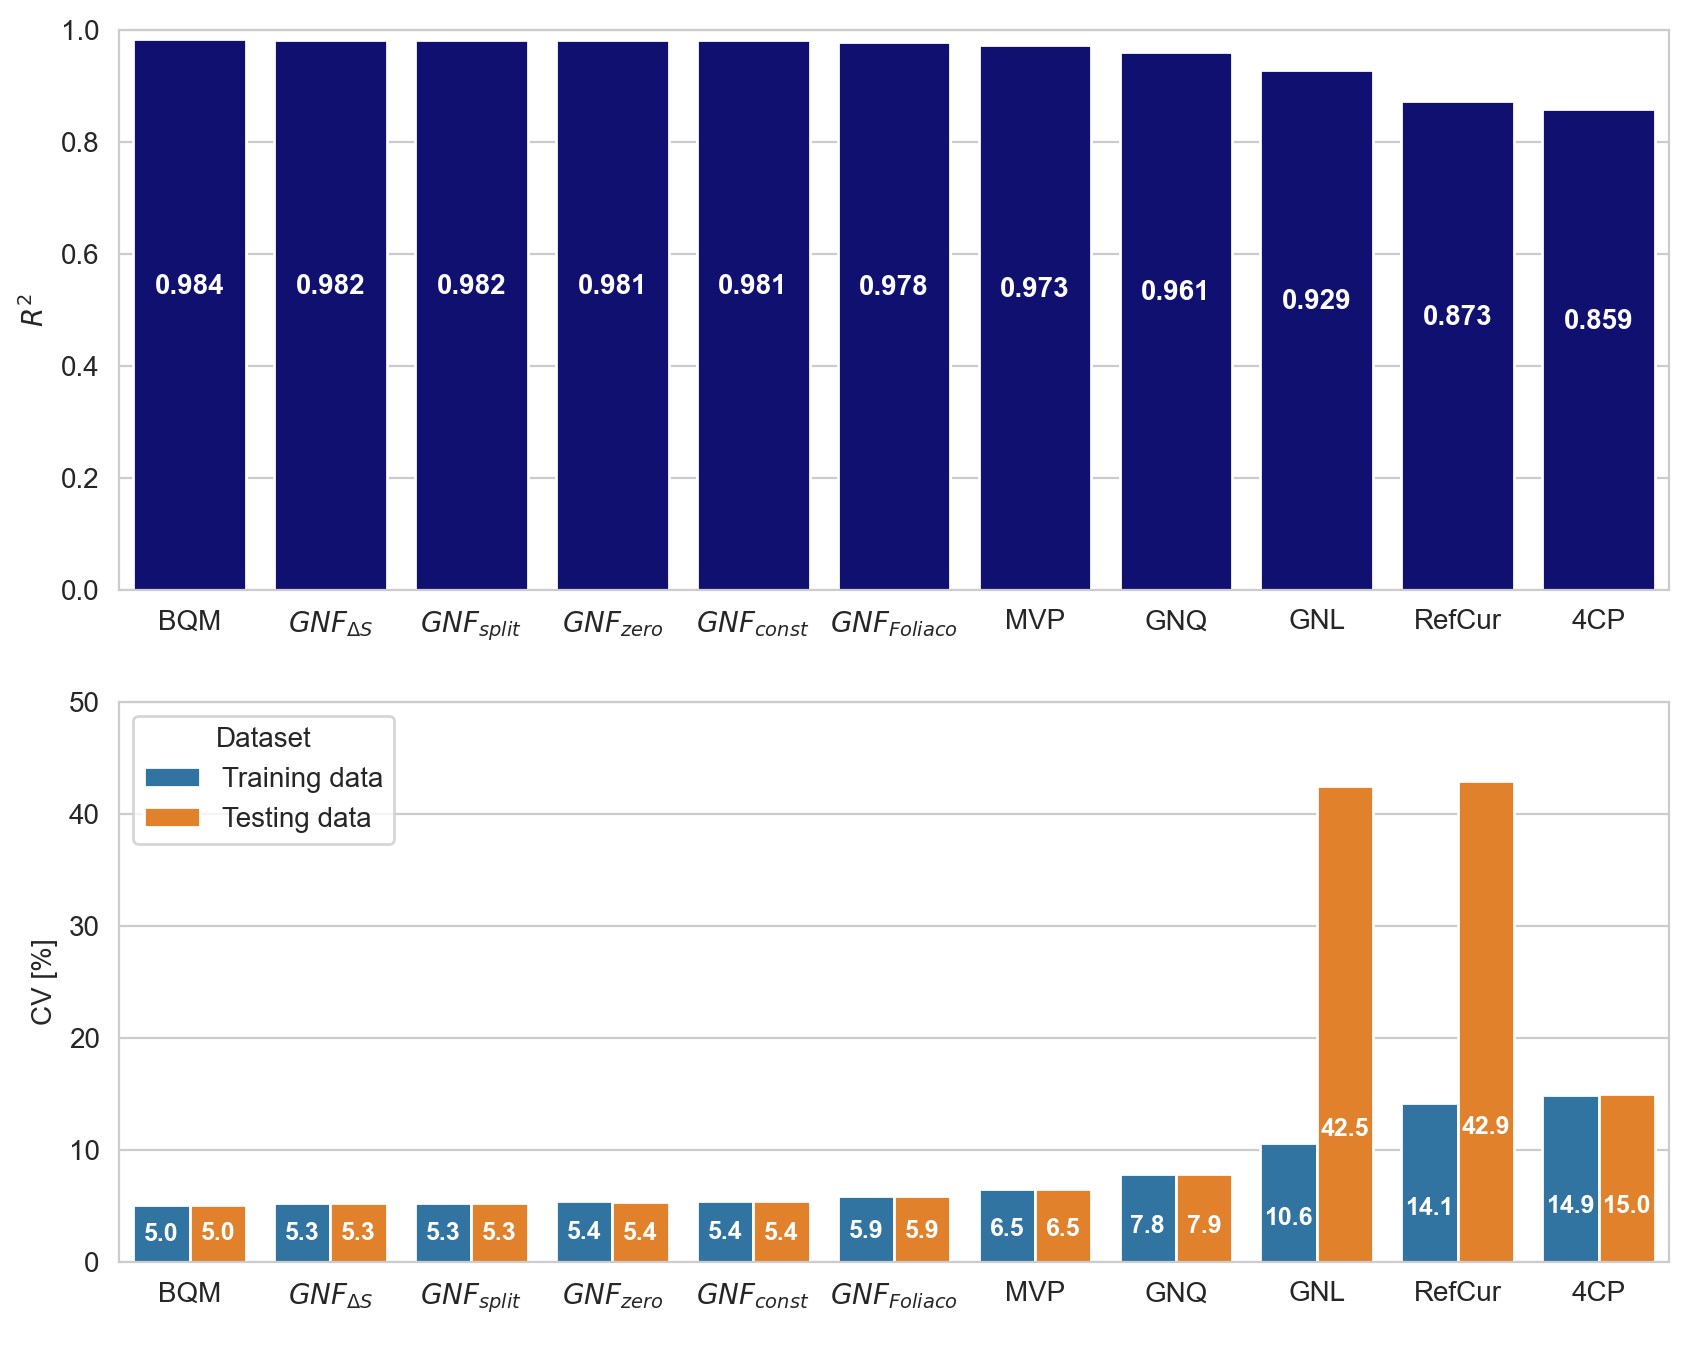

In [53]:
#The order of the labels is infered from the R2_df and CV_df
xlabels = ['BQM','$GNF_{\Delta{S}}$','$GNF_{split}$','$GNF_{zero}$','$GNF_{const}$','$GNF_{Foliaco}$','MVP','GNQ','GNL','RefCur','4CP']
            
stats_averages.reset_index()
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),dpi=200)

fig1 = sns.barplot(data=R2_df,x='Model',y='R2',ax=ax[0],color='navy',ci=None)
ax[0].set_ylim(0,1)
ax[0].set_ylabel('$R^{2}$')
ax[0].set_xlabel(' ')
# ax[0].yaxis.grid(True, linestyle='--',which='major', color='grey', alpha=0.7)
# fig1.legend(loc='upper right')
ax[0].set_xticklabels(xlabels)
# Adding formatted data labels to the bars with 3 decimal places
#ax[0].bar_label(ax[0].containers[0], label_type='center')    #This includes very many decimal places
for p in ax[0].patches:
    label_text = '{:.3f}'.format(p.get_height())  # Format the label with 3 decimal places
    ax[0].annotate(label_text, (p.get_x() + p.get_width() / 2., p.get_height()/2),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontweight='bold',color='white')

fig2 = sns.barplot(data=CV_df,x='Model',y='CV',ax=ax[1],hue='Dataset',ci=None)
ax[1].set_ylim(0,50)
ax[1].set_ylabel('CV [%]')
ax[1].set_xlabel(' ')
ax[1].set_xticklabels(xlabels)
# Adding formatted data labels to the bars with 2 decimal places
#ax[1].bar_label(ax[1].containers[1], label_type='edge');
for p in ax[1].patches:
    label_text = '{:.1f}'.format(p.get_height())  # Format the label with 1 decimal places
    ax[1].annotate(label_text, (p.get_x() + p.get_width() / 2., p.get_height()/4),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',fontsize=9,fontweight='bold',color='white')
    
fig.savefig('FullRange_Performances_CH1.png',bbox_inches='tight')

# Performance stats data into one df

In [54]:
all_stats = pd.concat(stats,axis=0)  #Combines all the dfs in the stats array into one df
all_stats.reset_index(names='Model',inplace=True) #Resets the index to have a column, Model, containing the models investigated!  

CV_data = all_stats[['Model','CV_train [%]','CV_test [%]']]

CV_data
CV_combined = pd.DataFrame({'Model':[],'Dataset':[],'CV':[]})
CV_combined['CV'] = pd.concat([CV_data['CV_train [%]'], CV_data['CV_test [%]']])
CV_combined['Model'] = pd.concat([CV_data['Model'], CV_data['Model']])
CV_combined['Dataset'] = ['Train']*len(CV_data)+['Test']*len(CV_data)

CV_combined

,Model,Dataset,CV
0,temp_ind,Train,10.598674
1,quasi_emp,Train,7.828545
2,GN_no_interc,Train,5.381137
3,GN_DS,Train,5.278427
4,GN_w_interc,Train,5.399334
...,...,...,...
325,GN_Foliaco,Test,5.784099
326,biquadratic,Test,5.101203
327,multivariate,Test,6.429607
328,4CP,Test,15.342269


**Scatter plots of key models**

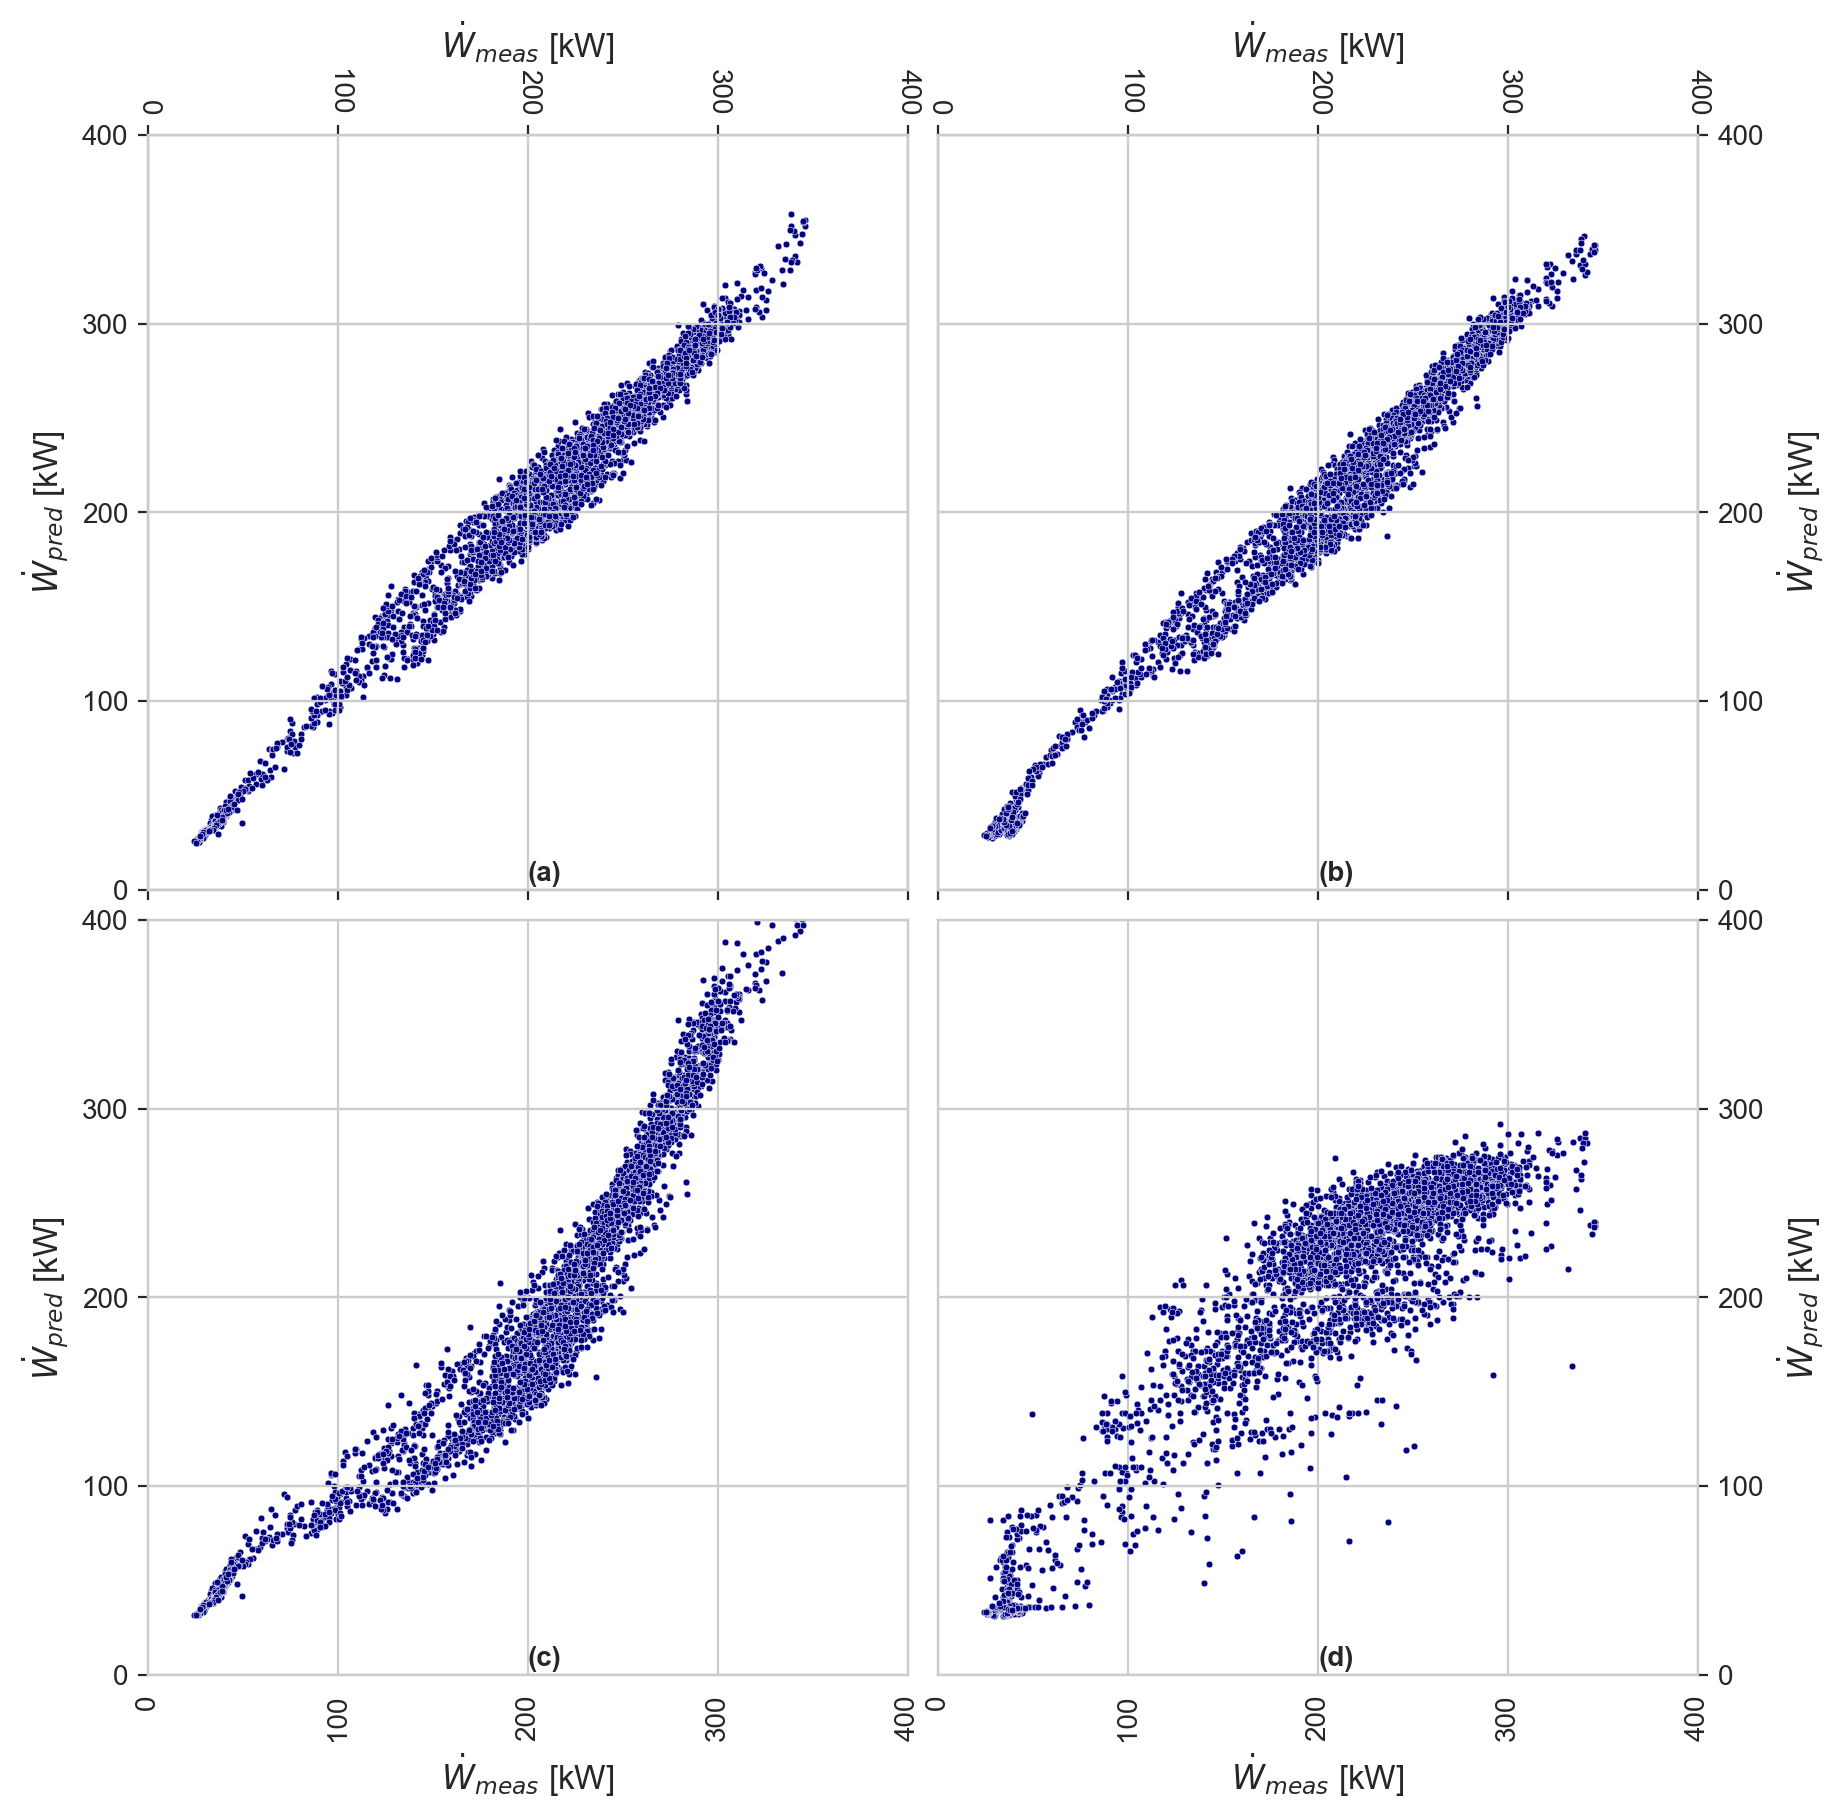

In [55]:
#Key Models to plot
key_models = ['biquadratic','GN_no_interc','RefCurves','4CP']
key_models_train = [train_performances[key] for key in key_models]
key_models_test = [test_performances[key] for key in key_models]

titles = ['BQM','$GNF_{zero}$','RefCurves','4CP']
title_text = ['(a)','(b)','(c)','(d)']
#Predictions of the key models
fig,ax = plt.subplots(2,2, figsize=(10,10),dpi=200)

for i in range(4):
    if i < 2:
        sns.scatterplot(data=key_models_train[i],x='ELE',y='ELE_pred',ax=ax[0][i],s=6,color='navy')
        ax[0][i].set_xlabel('',)
        #ax[0][i].set_title(titles[i])
        ax[0][i].set_xlim(0,400)
        ax[0][i].set_ylim(0,400)
        ax[0][i].set_yticks([0,100,200,300,400])
        ax[0][i].set_xticks([0,100,200,300,400])
        ax[0][i].text(200,5,title_text[i],fontweight='bold')
        ax[0][i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        
        #Secondary y axis for better readability
        sec_y1 = ax[0][i].twinx()
        sec_y1.set_ylim(0,400)
        sec_y1.set_yticks(np.linspace(0,400,5))
        #Secondary x axis for better readability
        sec_x1 = ax[0][i].twiny()
        sec_x1.set_xlim(0,400)
        sec_x1.set_xticks(np.linspace(0,400,5))
        sec_x1.tick_params(axis='x',rotation=-90)
        sec_x1.set_xlabel('$\dot{W}_{meas}$ [kW]', fontsize=12)
        
        if i == 1:
            ax[0][i].set_ylabel('',)
            ax[0][i].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            sec_y1.set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
        else:
            ax[0][i].set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
            sec_y1.tick_params(axis='y', which='both', left=False, right=False,labelright=False)
        
    else:
        sns.scatterplot(data=key_models_train[i],x='ELE',y='ELE_pred',ax=ax[1][i-2],s=6,color='navy')
        ax[1][i-2].set_xlabel('$\dot{W}_{meas}$ [kW]',fontsize=12)
        #ax[1][i-2].set_title(titles[i])
        ax[1][i-2].set_xlim(0,400)
        ax[1][i-2].set_ylim(0,400)
        ax[1][i-2].set_yticks([0,100,200,300,400])
        ax[1][i-2].set_xticks([0,100,200,300,400])
        ax[1][i-2].text(200,5,title_text[i],fontweight='bold')
        ax[1][i-2].tick_params(axis='x',rotation=90)
        
        #Secondary y axis for readability
        sec_y2 = ax[1][i-2].twinx()
        sec_y2.set_ylim(0,400)
        sec_y2.set_yticks(np.linspace(0,400,5))
        
        if i == 3:
            ax[1][i-2].set_ylabel('',)
            ax[1][i-2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            sec_y2.set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
        else:
            ax[1][i-2].set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
            sec_y2.tick_params(axis='y', which='both', left=False, right=False,labelright=False)

fig.subplots_adjust(hspace=0.04,wspace=0.04)

fig.savefig('Train_Performance_key_models_CH1.png',bbox_inches='tight')

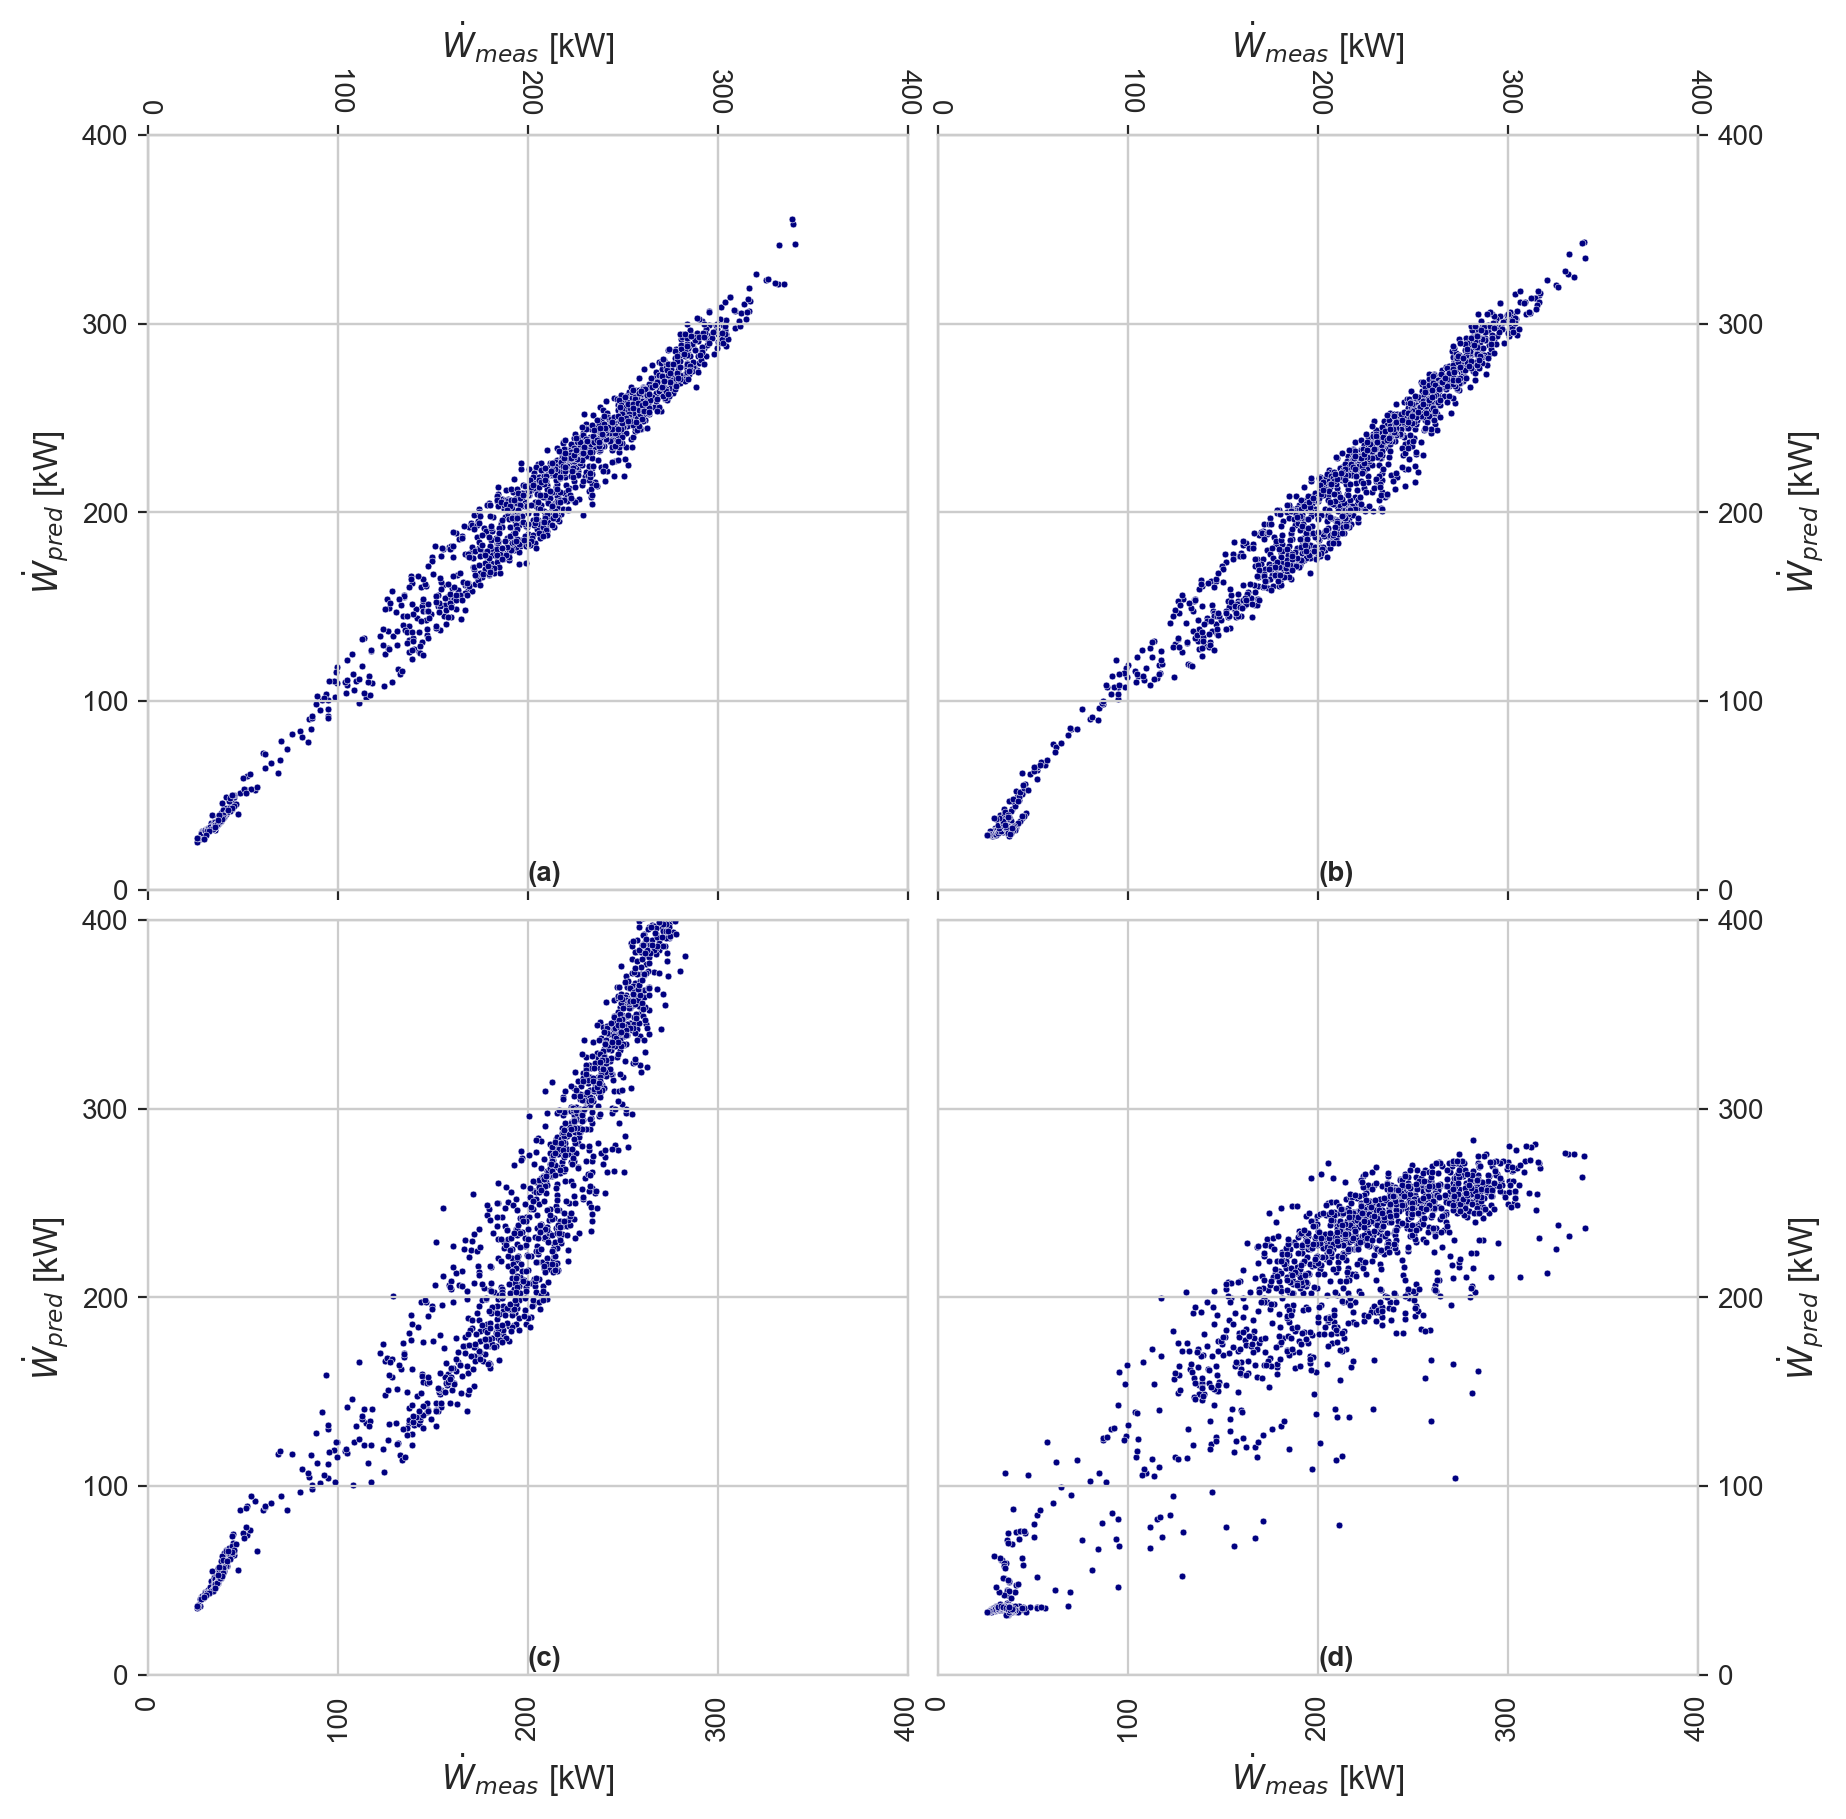

In [56]:
#Key Models to plot
key_models = ['biquadratic','GN_no_interc','RefCurves','4CP']
key_models_train = [train_performances[key] for key in key_models]
key_models_test = [test_performances[key] for key in key_models]

titles = ['BQM','$GNF_{zero}$','RefCurves','4CP']
title_text = ['(a)','(b)','(c)','(d)']
#Predictions of the key models
fig,ax = plt.subplots(2,2, figsize=(10,10),dpi=200)

for i in range(4):
    if i < 2:
        sns.scatterplot(data=key_models_test[i],x='ELE',y='ELE_pred',ax=ax[0][i],s=6,color='navy')
        ax[0][i].set_xlabel('',)
        #ax[0][i].set_title(titles[i])
        ax[0][i].set_xlim(0,400)
        ax[0][i].set_ylim(0,400)
        ax[0][i].set_yticks([0,100,200,300,400])
        ax[0][i].set_xticks([0,100,200,300,400])
        ax[0][i].text(200,5,title_text[i],fontweight='bold')
        ax[0][i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        
        #Secondary y axis for better readability
        sec_y1 = ax[0][i].twinx()
        sec_y1.set_ylim(0,400)
        sec_y1.set_yticks(np.linspace(0,400,5))
        #Secondary x axis for better readability
        sec_x1 = ax[0][i].twiny()
        sec_x1.set_xlim(0,400)
        sec_x1.set_xticks(np.linspace(0,400,5))
        sec_x1.tick_params(axis='x',rotation=-90)
        sec_x1.set_xlabel('$\dot{W}_{meas}$ [kW]', fontsize=12)
        
        if i == 1:
            ax[0][i].set_ylabel('',)
            ax[0][i].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            sec_y1.set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
        else:
            ax[0][i].set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
            sec_y1.tick_params(axis='y', which='both', left=False, right=False,labelright=False)
        
    else:
        sns.scatterplot(data=key_models_test[i],x='ELE',y='ELE_pred',ax=ax[1][i-2],s=6,color='navy')
        ax[1][i-2].set_xlabel('$\dot{W}_{meas}$ [kW]',fontsize=12)
        #ax[1][i-2].set_title(titles[i])
        ax[1][i-2].set_xlim(0,400)
        ax[1][i-2].set_ylim(0,400)
        ax[1][i-2].set_yticks([0,100,200,300,400])
        ax[1][i-2].set_xticks([0,100,200,300,400])
        ax[1][i-2].text(200,5,title_text[i],fontweight='bold')
        ax[1][i-2].tick_params(axis='x',rotation=90)
        
        #Secondary y axis for readability
        sec_y2 = ax[1][i-2].twinx()
        sec_y2.set_ylim(0,400)
        sec_y2.set_yticks(np.linspace(0,400,5))
        
        if i == 3:
            ax[1][i-2].set_ylabel('',)
            ax[1][i-2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
            sec_y2.set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
        else:
            ax[1][i-2].set_ylabel('$\dot{W}_{pred}$ [kW]', fontsize=12)
            sec_y2.tick_params(axis='y', which='both', left=False, right=False,labelright=False)

fig.subplots_adjust(hspace=0.04,wspace=0.04)

fig.savefig('Test_Performance_key_models_CH1.png',bbox_inches='tight')